## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
#mouse_metadata_path = "data/Mouse_metadata.csv"
#study_results_path = "data/Study_results.csv"
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
data_non_dup = data.drop_duplicates(subset = 'Mouse ID', keep = False)
data_non_dup['Mouse ID'].count()


12

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_group = data.groupby(['Mouse ID','Timepoint'])
for name,group in data_group:
    print (name)
    print (group)


('a203', 0)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
113     a203          0                45.0                 0    Infubinol   

        Sex  Age_months  Weight (g)  
113  Female          20          23  
('a203', 5)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
389     a203          5           48.508468                 0    Infubinol   

        Sex  Age_months  Weight (g)  
389  Female          20          23  
('a203', 10)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
598     a203         10           51.852437                 1    Infubinol   

        Sex  Age_months  Weight (g)  
598  Female          20          23  
('a203', 15)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
758     a203         15            52.77787                 1    Infubinol   

        Sex  Age_months  Weight (g)  
758  Female          20          23  
('a203', 20)
     

904  Female          10          25  
('a444', 20)
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1080     a444         20           41.714619                 0     Ramicane   

         Sex  Age_months  Weight (g)  
1080  Female          10          25  
('a444', 25)
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1192     a444         25           42.291394                 0     Ramicane   

         Sex  Age_months  Weight (g)  
1192  Female          10          25  
('a444', 30)
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1344     a444         30           42.786278                 0     Ramicane   

         Sex  Age_months  Weight (g)  
1344  Female          10          25  
('a444', 35)
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1513     a444         35           41.735951                 0     Ramicane   

         Sex  Age_months  Weight (g)  
1

('c282', 10)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
623     c282         10           48.179506                 0      Placebo   

      Sex  Age_months  Weight (g)  
623  Male          12          27  
('c282', 15)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
776     c282         15           49.266079                 0      Placebo   

      Sex  Age_months  Weight (g)  
776  Male          12          27  
('c282', 20)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
990     c282         20           51.950574                 0      Placebo   

      Sex  Age_months  Weight (g)  
990  Male          12          27  
('c282', 25)
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1235     c282         25             56.2922                 1      Placebo   

       Sex  Age_months  Weight (g)  
1235  Male          12          27  
('c282', 30)
     Mouse ID  

60  Female           4          17  
('j913', 5)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
299     j913          5             44.0149                 0     Ramicane   

        Sex  Age_months  Weight (g)  
299  Female           4          17  
('j913', 10)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
651     j913         10           44.497162                 0     Ramicane   

        Sex  Age_months  Weight (g)  
651  Female           4          17  
('j913', 15)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
890     j913         15           45.252534                 0     Ramicane   

        Sex  Age_months  Weight (g)  
890  Female           4          17  
('j913', 20)
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1098     j913         20           42.168341                 0     Ramicane   

         Sex  Age_months  Weight (g)  
1098  Female   

('n678', 10)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
497     n678         10           49.145709                 1     Propriva   

      Sex  Age_months  Weight (g)  
497  Male           5          29  
('n763', 0)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
147     n763          0                45.0                 0      Placebo   

        Sex  Age_months  Weight (g)  
147  Female          16          25  
('n763', 5)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
388     n763          5           46.085981                 0      Placebo   

        Sex  Age_months  Weight (g)  
388  Female          16          25  
('n763', 10)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
675     n763         10           46.817315                 1      Placebo   

        Sex  Age_months  Weight (g)  
675  Female          16          25  
('n763', 15)
    Mouse

1113  Male          24          29  
('u153', 0)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
182     u153          0                45.0                 0     Ceftamin   

        Sex  Age_months  Weight (g)  
182  Female          11          25  
('u196', 0)
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
74     u196          0                45.0                 0     Ramicane   

     Sex  Age_months  Weight (g)  
74  Male          18          25  
('u196', 5)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
436     u196          5           45.557464                 1     Ramicane   

      Sex  Age_months  Weight (g)  
436  Male          18          25  
('u196', 10)
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
636     u196         10           46.422943                 1     Ramicane   

      Sex  Age_months  Weight (g)  
636  Male          18          25 

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_non_dup = data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = False)
data_non_dup


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
data_non_dup['Mouse ID'].count()


1883

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary = pd.DataFrame(columns = ('Drug Regimen', 'Mean','Median','Variance','Standard Deviation','SEM'))
data_regimen = data_non_dup.groupby('Drug Regimen')
i = 0
for name,group in data_regimen:
    #print (name)
    i += 1
    
    regimen = name
    mean = data_non_dup[data_non_dup['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].mean()
    median = data_non_dup[data_non_dup['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].median()
    variance = data_non_dup[data_non_dup['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].var()
    stdev = data_non_dup[data_non_dup['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].std()
    count = data_non_dup[data_non_dup['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].count()
    sem = data_non_dup[data_non_dup['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].sem()
    
    rr = {'Drug Regimen': regimen,
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': stdev,
    'SEM': sem}
    summary.loc[i] = rr

summary = summary.set_index('Drug Regimen')
summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data_non_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

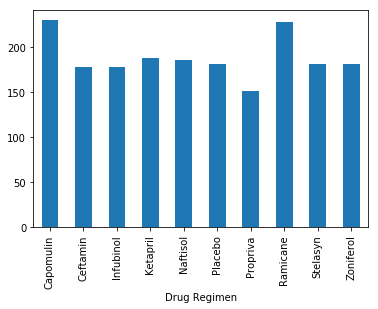

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_bar = data_non_dup.groupby('Drug Regimen')['Timepoint'].agg('count')
data_bar.plot(x='Drug Regimen', y='count', kind='bar')
plt.show()


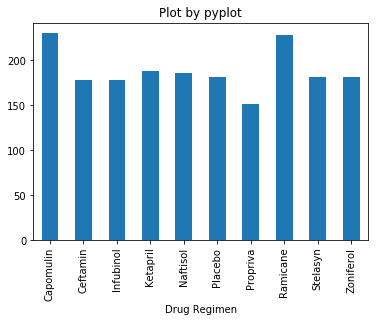

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data_bar.plot.bar(y="count")
plt.title("Plot by pyplot")
plt.show()


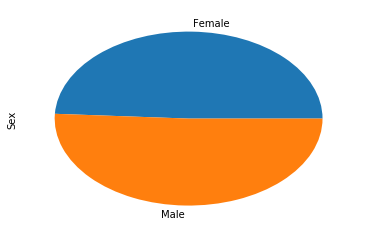

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_pie = data_non_dup.groupby('Sex')['Sex'].agg('count')
data_pie.plot(x='Sex', y='count', kind='pie')
plt.show()


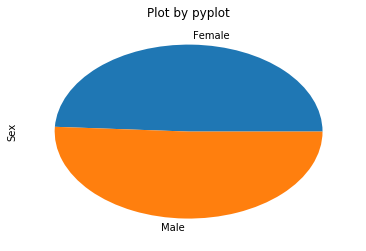

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data_pie.plot.pie(y="count")
plt.title("Plot by pyplot")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
data_last_timepoint = data_non_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('max')
data_last_timepoint = pd.DataFrame(data_last_timepoint)
data_last_timepoint = data_last_timepoint.rename(columns={'Tumor Volume (mm3)':'last timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_non_dup_merge = pd.merge(data_non_dup, data_last_timepoint, how="left", on=["Drug Regimen", "Drug Regimen"])
data_non_dup_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),last timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,48.158209
1,f932,0,45.000000,0,Ketapril,Male,15,29,78.567014
2,g107,0,45.000000,0,Ketapril,Female,2,29,78.567014
3,a457,0,45.000000,0,Ketapril,Female,11,30,78.567014
4,c819,0,45.000000,0,Ketapril,Male,21,25,78.567014
...,...,...,...,...,...,...,...,...,...
1878,r944,45,41.581521,2,Capomulin,Male,12,25,48.158209
1879,u364,45,31.023923,3,Capomulin,Male,18,17,48.158209
1880,p438,45,61.433892,1,Ceftamin,Female,11,26,68.923185
1881,x773,45,58.634971,4,Placebo,Female,21,30,73.212939


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
a = []
data_regimen = data_non_dup.groupby('Drug Regimen')
for name,group in data_regimen:
    a.append(name)

# Create empty list to fill with tumor vol data (for plotting)
b = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
n = len(data_non_dup_merge)
for u in a:   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tv = 0
    for i in range(n):
        if u == data_non_dup_merge['Drug Regimen'][i]:
            final_tv += data_non_dup_merge['Tumor Volume (mm3)'][i]
    
    # add subset 
    b.append(final_tv)

print(b)
    
    # Determine outliers using upper and lower bounds
q1 = np.percentile(b, 25, interpolation='midpoint')
q3 = np.percentile(b, 75, interpolation='midpoint')
up_value = q3 + 1.5 * (q3 - q1)
low_value = q3 - 1.5 * (q3 - q1)
print(up_value)
print(low_value)


[9355.42046243, 9361.228582110001, 9413.493529329999, 10384.29987641, 10105.67102645, 9780.078122330004, 7921.196356359995, 9169.417875210003, 9816.199990700004, 9689.04419239]
10457.860857882508
9138.417255147499


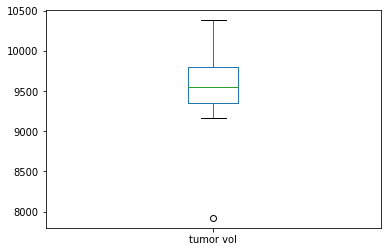

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_boxplot = pd.DataFrame({"treatments": a, "tumor vol": b})
df = pd.DataFrame(data_boxplot)
df.plot.box()
plt.show()


## Line and Scatter Plots

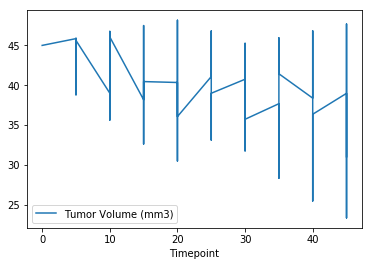

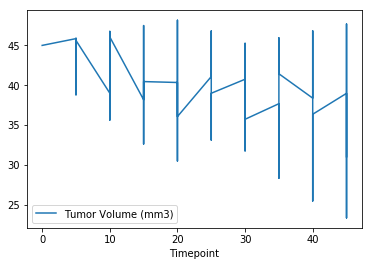

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data_line = data_non_dup_merge[data_non_dup_merge['Drug Regimen'] == "Capomulin"]
data_line.plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.show()


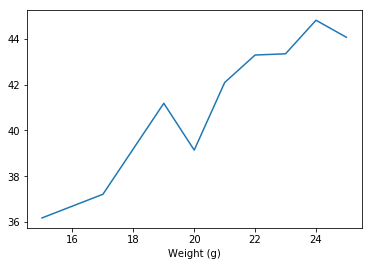

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data_scatter = data_line.groupby('Weight (g)')['Tumor Volume (mm3)'].agg('mean')
data_scatter.plot()
plt.show()


## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(data_line.corr())




                       Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Timepoint           1.000000e+00       -5.842709e-01      5.840064e-01   
Tumor Volume (mm3) -5.842709e-01        1.000000e+00     -3.130920e-01   
Metastatic Sites    5.840064e-01       -3.130920e-01      1.000000e+00   
Age_months         -5.796388e-02       -2.160443e-02      6.748247e-03   
Weight (g)         -3.527149e-02        5.256996e-01     -1.191486e-01   
last timepoint      1.443578e-15       -3.858001e-16     -4.025996e-16   

                      Age_months    Weight (g)  last timepoint  
Timepoint          -5.796388e-02 -3.527149e-02    1.443578e-15  
Tumor Volume (mm3) -2.160443e-02  5.256996e-01   -3.858001e-16  
Metastatic Sites    6.748247e-03 -1.191486e-01   -4.025996e-16  
Age_months          1.000000e+00 -1.691722e-01   -1.186869e-16  
Weight (g)         -1.691722e-01  1.000000e+00    5.928315e-16  
last timepoint     -1.186869e-16  5.928315e-16    1.000000e+00  
